<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

###  Big Query, SQL, Classification

---

### The Data

There are 5 individual tables that have the information, contained in a Google BigQuery database.  The setup info for BigQuery is located on our DSI wiki.  You will have to query with SQL, the dataset in order to complete this project.

The tables, with cooresonding attributes that exist are:

### businesses
- business_id: unique business identifier
- name: name of the business
- review_count: number of reviews per business
- city: city business resides in
- stars: average rating
- categories: categories the business falls into (can be one or multiple)
- latitude
- longitude
- neighborhoods: neighborhoods business belongs to
- variable: "property" of the business (a tag)
- value: True/False for the property

### reviews
- user_id: unique user identifier
- review_id: unique review identifier
- votes.cool: how many thought the review was "cool"
- business_id: unique business id the review is for
- votes.funny: how many thought the review was funny
- stars: rating given
- date: date of review
- votes.useful: how many thought the review was useful
- ... 100 columns of counts of most common 2 word phrases that appear in reviews in this review

### users
- yelping_since: signup date
- compliments.plain: # of compliments "plain"
- review_count: # of reviews:
- compliments.cute: total # of compliments "cute"
- compliments.writer: # of compliments "writer"
- compliments.note: # of compliments "note" (not sure what this is)
- compliments.hot: # of compliments "hot" (?)
- compliments.cool: # of compliments "cool"
- compliments.profile: # of compliments "profile"
- average_stars: average rating
- compliments.more: # of compliments "more"
- elite: years considered "elite"
- name: user's name
- user_id: unique user id
- votes.cool: # of votes "cool"
- compliments.list: # of compliments "list"
- votes.funny: # of compliments "funny"
- compliments.photos: # of compliments "photos"
- compliments.funny: # of compliments "funny"
- votes.useful: # of votes "useful"

### checkins
- business_id: unique business identifier
- variable: day-time identifier of checkins (0-0 is Sunday 0:00 - 1:00am,  for example)
- value: # of checkins at that time

### tips
- user_id: unique user identifier
- business_id: unique business identifier
- likes: likes that the tip has
- date: date of tip
- ... 100 columns of counts of most common 2 word phrases that appear in tips in this tip


The reviews and tips datasets in particular have parsed "NLP" columns with counts of 2-word phrases in that review or tip (a "tip", it seems, is some kind of smaller review).

The user dataset has a lot of columns of counts of different compliments and votes. We're not sure whether the compliments or votes are by the user or for the user.

Full details about this dataset area located here:
https://bigquery.cloud.google.com/dataset/bigquery-dsi-dave:yelp_arizona

---


If you look at the website, or the full data, you'll see I have removed pieces of the data and cut it down quite a bit. This is to simplify it for this project. Specifically, business are limited to be in these cities:

- Phoenix
- Surprise
- Las Vegas
- Waterloo

Apparently there is a city called "Surprise" in Arizona. 

Businesses are also restricted to at least be in one of the following categories, because we thought the mix of them was funny:

- Airports
- Breakfast & Brunch
- Bubble Tea
- Burgers
- Bars
- Bakeries
- Breweries
- Cafes
- Candy Stores
- Comedy Clubs
- Courthouses
- Dance Clubs
- Fast Food
- Museums
- Tattoo
- Vape Shops
- Yoga
    
---

### Project requirements

**You will be performing 4 different sections of analysis, like in the last project.**

Remember that classification targets are categorical and regression targets are continuous variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load your dataset(s) / setup / configure GBQ connection

---

Information about this dataset is located here:


**If you haven't done so, setup a project with the Google developer portal, following the directions here: [Getting Started with BigQuery](https://github.com/ga-students/DSI-SF-4/wiki/Getting-Started-with-BigQuery)**

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

project_id = "bigquery-dsi-wg"

sql = """
SELECT votes_funny, votes_cool FROM [bigquery-dsi-dave:yelp_arizona.reviews] 
LIMIT 5
"""

df = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 5 rows.

Total time taken 3.39 s.
Finished at 2016-12-19 21:42:44.


In [2]:
df.columns

Index([u'votes_funny', u'votes_cool'], dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
votes_funny    5 non-null int64
votes_cool     5 non-null int64
dtypes: int64(2)
memory usage: 152.0 bytes


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Constructing a "profile" for Las Vegas

---

Yelp is interested in building out what they are calling "profiles" for cities. They want you to start with just Las Vegas to see what a prototype of this would look like. Essentially, they want to know what makes Las Vegas distinct from the other four.

Use the data you have to predict Las Vegas from the other variables you have. You should not be predicting the city from any kind of location data or other data perfectly associated with that city (or another city).

You may use any classification algorithm you deem appropriate, or even multiple models. You should:

1. Build at least one model predicting Las Vegas vs. the other cities.
- Validate your model(s).
- Interpret and visualize, in some way, the results.
- Write up a "profile" for Las Vegas. This should be a writeup converting your findings from the model(s) into a human-readable description of the city.

*Research location data to find the city targets.*

In [4]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.businesses];
"""

businesses = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 1; 21.0% done. Elapsed 7.02 s.
  Got page: 2; 42.0% done. Elapsed 13.35 s.
  Got page: 3; 62.0% done. Elapsed 20.7 s.
  Got page: 4; 83.0% done. Elapsed 27.99 s.
  Got page: 5; 100.0% done. Elapsed 33.54 s.
Got 152832 rows.

Total time taken 47.31 s.
Finished at 2016-12-19 21:43:39.


In [5]:
sql = """
SELECT * FROM [bigquery-dsi-dave:yelp_arizona.users];
"""

users = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 23.0% done. Elapsed 11.46 s.
  Got page: 3; 35.0% done. Elapsed 18.11 s.
  Got page: 4; 46.0% done. Elapsed 24.67 s.
  Got page: 5; 58.0% done. Elapsed 31.22 s.
  Got page: 6; 69.0% done. Elapsed 37.31 s.
  Got page: 7; 81.0% done. Elapsed 43.03 s.
  Got page: 8; 92.0% done. Elapsed 48.28 s.
  Got page: 9; 100.0% done. Elapsed 52.23 s.
Got 144206 rows.

Total time taken 73.95 s.
Finished at 2016-12-19 21:44:58.


In [6]:
businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152832 entries, 0 to 152831
Data columns (total 11 columns):
business_id      152832 non-null object
name             152832 non-null object
review_count     152832 non-null int64
city             152832 non-null object
stars            152832 non-null float64
categories       152832 non-null object
latitude         152832 non-null float64
longitude        152832 non-null float64
neighborhoods    152832 non-null object
variable         152832 non-null object
value            152832 non-null bool
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 11.8+ MB


In [7]:
businesses.isnull().sum()

business_id      0
name             0
review_count     0
city             0
stars            0
categories       0
latitude         0
longitude        0
neighborhoods    0
variable         0
value            0
dtype: int64

### Unique values for each column in Businesses DataFrame

In [8]:
unique_values = pd.DataFrame()
for i in businesses.columns:
    unique_values[i]=businesses[i].unique().shape
unique_values

,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,4132,2785,496,4,9,984,3714,3712,34,78,2


### Change True/False values in 'value' column into 1/0

In [9]:
businesses.value = businesses.value.map(lambda x: 1 if x == True else 0)

### Convert the attributes in 'variable' column from long to wide format

In [10]:
businesses_wide = pd.pivot_table(businesses, columns=['variable'], values='value', aggfunc=lambda x: x.iloc[0],
    fill_value=0, index=['business_id', 'city', 'neighborhoods',  'name', 'review_count', 'stars', 'categories']).reset_index()

### Check the wide format

In [11]:
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Data columns (total 85 columns):
business_id                                    4132 non-null object
city                                           4132 non-null object
neighborhoods                                  4132 non-null object
name                                           4132 non-null object
review_count                                   4132 non-null int64
stars                                          4132 non-null float64
categories                                     4132 non-null object
attributes.Accepts Credit Cards                4132 non-null int64
attributes.Accepts Insurance                   4132 non-null int64
attributes.Ages Allowed                        4132 non-null int64
attributes.Alcohol                             4132 non-null int64
attributes.Ambience.casual                     4132 non-null int64
attributes.Ambience.classy                     4132 non-null int64
attributes.Ambi

In [12]:
businesses_wide.head()

variable,business_id,city,neighborhoods,name,review_count,stars,categories,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,...,hours.Saturday.open,hours.Sunday.close,hours.Sunday.open,hours.Thursday.close,hours.Thursday.open,hours.Tuesday.close,hours.Tuesday.open,hours.Wednesday.close,hours.Wednesday.open,open
0,--jFTZmywe7StuZ2hEjxyA,Las Vegas,[],Subway,7,3.5,"['Fast Food', 'Sandwiches', 'Restaurants']",1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,-0HGqwlfw3I8nkJyMHxAsQ,Phoenix,[],McDonald's,9,3.0,"['Burgers', 'Fast Food', 'Restaurants']",1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0VK5Z1BfUHUYq4PoBYNLw,Las Vegas,['Eastside'],T Spot,5,3.5,"['Bars', 'Nightlife', 'Lounges']",1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0bUDim5OGuv8R0Qqq6J4A,Phoenix,[],IHOP,8,2.0,"['Bakeries', 'Food', 'Breakfast & Brunch', 'Re...",1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1bOb2izeJBZjHC7NWxiPA,Phoenix,[],First Watch,120,4.0,"['Breakfast & Brunch', 'Cafes', 'American (Tra...",1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
# number of attributes under the 'variable' column in the original businesses dataframe for business id --jFTZmywe7StuZ2hEjxyA
businesses[businesses.business_id == '--jFTZmywe7StuZ2hEjxyA']['value'].sum()

8

In [14]:
# number of attributes for the same business in the wide format. They match. Check. 
businesses_wide.iloc[0,7:].sum()

8

### Simplify Categories 

In [15]:
businesses.categories.value_counts()

['Burgers', 'Fast Food', 'Restaurants']                                                                         9522
['Fast Food', 'Restaurants']                                                                                    5752
['Fast Food', 'Sandwiches', 'Restaurants']                                                                      5616
['Burgers', 'Restaurants']                                                                                      4817
['Fast Food', 'Mexican', 'Restaurants']                                                                         4726
['Bars', 'Nightlife', 'Lounges']                                                                                3901
['Breakfast & Brunch', 'American (Traditional)', 'Restaurants']                                                 3595
['Bars', 'Nightlife']                                                                                           3030
['Breakfast & Brunch', 'Restaurants']                           

### 334 categories are still too many

In [16]:
import numpy as np
category_list = []
for category in businesses.categories:
    try:
        category_list.extend(category.split(', '))
    except:
        pass
category_list = np.unique(category_list)
len(category_list)

334

### Simply from currently 984 to 17 broader categories defined in the prompt

In [17]:
category_list = [
'Airports',
'Breakfast & Brunch',
'Bubble Tea',
'Burgers',
'Bars',
'Bakeries',
'Breweries',
'Cafes',
'Candy Stores',
'Comedy Clubs',
'Courthouses',
'Dance Clubs',
'Fast Food',
'Museums',
'Tattoo',
'Vape Shops',
'Yoga']


In [18]:
def parse_category(series_value, column_name=None):
    try:
        if column_name in series_value:
            return 1
        else:
            return 0
    except:
        return 0

In [19]:
for x in category_list:
    businesses_wide[x] = businesses_wide.categories.apply(parse_category,column_name=x)

### Check if any rows has no category, and there isn't any. Yah!

In [20]:
businesses_wide[businesses_wide.iloc[:, 85:].sum(axis = 1) == 0]

variable,business_id,city,neighborhoods,name,review_count,stars,categories,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,...,Cafes,Candy Stores,Comedy Clubs,Courthouses,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga


### Fun facts: There are a lot of Subways and McDonald's. Most reviewed restaurant is Mon Ami Gabi 

In [21]:
businesses.name.value_counts()

Subway                                            4939
McDonald's                                        4347
Taco Bell                                         2592
Burger King                                       1924
Wendy's                                           1606
PT's                                              1421
KFC                                               1404
Denny's                                           1350
Chipotle Mexican Grill                            1235
Sonic Drive-In                                    1172
El Pollo Loco                                     1061
Jack in the Box                                   1054
Roberto's Taco Shop                                961
In-N-Out Burger                                    789
Smashburger                                        780
Five Guys Burgers and Fries                        768
Firehouse Subs                                     766
Applebee's                                         762
Carl's Jr 

In [22]:
businesses.review_count.unique().max()

5642

In [23]:
sql = """
SELECT * 
FROM [bigquery-dsi-dave:yelp_arizona.businesses]
WHERE business_id = '4bEjOyTaDG24SY5TxsaUNQ';
"""
pd.read_gbq(sql, project_id=project_id)


Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 55 rows.

Total time taken 1.0 s.
Finished at 2016-12-19 21:48:52.


,business_id,name,review_count,city,stars,categories,latitude,longitude,neighborhoods,variable,value
0,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Attire,False
1,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Good For.brunch,True
2,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Caters,False
3,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Outdoor Seating,True
4,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],hours.Sunday.open,False
5,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Good For Groups,True
6,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Corkage,True
7,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Parking.valet,False
8,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],hours.Monday.close,False
9,4bEjOyTaDG24SY5TxsaUNQ,Mon Ami Gabi,5642,Las Vegas,4,"['Breakfast & Brunch', 'Steakhouses', 'French'...",36.112952,-115.172589,['The Strip'],attributes.Has TV,False


### Final DataFrame - Merge tables together for modeling
1. Start with the businesses_wide dataframe 4132 x 102 including:
    - business_id, name, review_count, city, stars, neighborhoods, categories
    - 78 attribute columns from 'variable' column in the original businesses dataframe
    - 17 broader categories
2. Remove 'categories' column  4132 x 101.
3. Incorporate TotalTips and TotalCheckins as two new columns. 4132 x 103. 

In [24]:
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Columns: 102 entries, business_id to Yoga
dtypes: float64(1), int64(96), object(5)
memory usage: 3.2+ MB


In [25]:
businesses_wide = businesses_wide.drop('categories', 1)

In [26]:
businesses_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4132 entries, 0 to 4131
Columns: 101 entries, business_id to Yoga
dtypes: float64(1), int64(96), object(4)
memory usage: 3.2+ MB


In [27]:
sql = """
SELECT business_id, SUM(CAST(value AS FLOAT)) AS TotalCheckins
FROM [bigquery-dsi-dave:yelp_arizona.checkins]
GROUP BY business_id;
"""

checkins = pd.read_gbq(sql, project_id=project_id)
checkins.info()

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 3846 rows.

Total time taken 1.68 s.
Finished at 2016-12-19 21:49:14.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 2 columns):
business_id      3846 non-null object
TotalCheckins    3846 non-null int64
dtypes: int64(1), object(1)
memory usage: 60.2+ KB


In [28]:
sql = """
SELECT business_id, COUNT(date) AS TotalTips
FROM [bigquery-dsi-dave:yelp_arizona.tips]
GROUP BY business_id;
"""

tips = pd.read_gbq(sql, project_id=project_id)
tips.info()

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 3752 rows.

Total time taken 2.2 s.
Finished at 2016-12-19 21:49:28.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3752 entries, 0 to 3751
Data columns (total 2 columns):
business_id    3752 non-null object
TotalTips      3752 non-null int64
dtypes: int64(1), object(1)
memory usage: 58.7+ KB


In [29]:
df_temp = pd.merge(businesses_wide, checkins, on='business_id', how='outer')
business_final = pd.merge(df_temp, tips, on='business_id', how='outer')

In [30]:
# Fill NA values in TotalTips and TotalCheckins columns with 0
business_final.fillna(0, inplace=True)

In [31]:
business_final.isnull().sum()

variable
business_id                                    0
city                                           0
neighborhoods                                  0
name                                           0
review_count                                   0
stars                                          0
attributes.Accepts Credit Cards                0
attributes.Accepts Insurance                   0
attributes.Ages Allowed                        0
attributes.Alcohol                             0
attributes.Ambience.casual                     0
attributes.Ambience.classy                     0
attributes.Ambience.divey                      0
attributes.Ambience.hipster                    0
attributes.Ambience.intimate                   0
attributes.Ambience.romantic                   0
attributes.Ambience.touristy                   0
attributes.Ambience.trendy                     0
attributes.Ambience.upscale                    0
attributes.Attire                              0
attributes.

In [32]:
business_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4132 entries, 0 to 4131
Columns: 103 entries, business_id to TotalTips
dtypes: float64(3), int64(96), object(4)
memory usage: 3.3+ MB


### Model

In [33]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [34]:
business_final.city = business_final.city.map(lambda x: 1 if x == 'Las Vegas' else 0)

In [35]:
business_final.head()

variable,business_id,city,neighborhoods,name,review_count,stars,attributes.Accepts Credit Cards,attributes.Accepts Insurance,attributes.Ages Allowed,attributes.Alcohol,...,Comedy Clubs,Courthouses,Dance Clubs,Fast Food,Museums,Tattoo,Vape Shops,Yoga,TotalCheckins,TotalTips
0,--jFTZmywe7StuZ2hEjxyA,1,[],Subway,7,3.5,1,0,0,0,...,0,0,0,1,0,0,0,0,84.0,3.0
1,-0HGqwlfw3I8nkJyMHxAsQ,0,[],McDonald's,9,3.0,1,0,0,0,...,0,0,0,1,0,0,0,0,38.0,5.0
2,-0VK5Z1BfUHUYq4PoBYNLw,1,['Eastside'],T Spot,5,3.5,1,0,0,0,...,0,0,0,0,0,0,0,0,27.0,4.0
3,-0bUDim5OGuv8R0Qqq6J4A,0,[],IHOP,8,2.0,1,0,0,0,...,0,0,0,0,0,0,0,0,28.0,6.0
4,-1bOb2izeJBZjHC7NWxiPA,0,[],First Watch,120,4.0,1,0,0,0,...,0,0,0,0,0,0,0,0,596.0,49.0


In [36]:
# 99 columns in design matrix

y = business_final.city.values
X = business_final.iloc[:, 4:].values

In [37]:
# Normalize the predictors

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xn = ss.fit_transform(X)

In [56]:
# Gridsearch the LogisticRegression with regularization.

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 1000, 50)
}

lr1_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr1_gs.fit(Xn, y)
print lr1_gs.best_params_
best_lr1 = lr1_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   10.5s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  1.5min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  3.7min
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.9min finished


{'penalty': 'l2', 'C': 20.408261224489795, 'solver': 'liblinear'}


In [60]:
# Gridsearch the LogisticRegression with regularization.

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 100, 50)
}

lr_gs = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs.fit(Xn, y)
print lr_gs.best_params_
best_lr = lr_gs.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    7.9s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:   44.1s
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.5min finished


{'penalty': 'l2', 'C': 14.2858, 'solver': 'liblinear'}


In [41]:
# Gridsearch the KNN.
knn_params = {
    'n_neighbors':range(1,101),
    'weights':['uniform','distance']
}

knn_gs = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, verbose=1)

knn_gs.fit(Xn, y)

print knn_gs.best_params_
best_knn = knn_gs.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   31.3s
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  2.4min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed:  5.9min
[Parallel(n_jobs=1)]: Done 799 tasks       | elapsed: 10.3min


{'n_neighbors': 40, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 12.8min finished


### Logistic Regression wins over KNN. But I thought it would be more of a Lasso (l1) rather than Ridge model....

In [64]:
print best_lr1, best_lr

LogisticRegression(C=20.408261224489795, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) LogisticRegression(C=14.2858, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [70]:
cv_indices = StratifiedKFold(y, n_folds=5)

lr1_scores = []
lr_scores = []
knn_scores = []

for train_inds, test_inds in cv_indices:

    Xtr, ytr = Xn[train_inds, :], y[train_inds]
    Xte, yte = Xn[test_inds, :], y[test_inds]
    
    best_lr1.fit(Xtr, ytr)
    lr1_scores.append(best_lr1.score(Xte, yte))
     
    best_lr.fit(Xtr, ytr)
    lr_scores.append(best_lr.score(Xte, yte))
    
    best_knn.fit(Xtr, ytr)
    knn_scores.append(best_knn.score(Xte, yte))

print 'Logistic Regression with C=20.4083:'
print lr1_scores
print np.mean(lr1_scores)

print 'Logistic Regression with C=14.2858:'
print lr_scores
print np.mean(lr_scores)

print 'KNN:'
print knn_scores
print np.mean(knn_scores)

print 'Baseline accuracy:', np.mean(y)

Logistic Regression with C=20.4083:
[0.67593712212817414, 0.73035066505441359, 0.70823244552058107, 0.68886198547215494, 0.72639225181598066]
0.705954893998
Logistic Regression with C=14.2858:
[0.67593712212817414, 0.73035066505441359, 0.70823244552058107, 0.68886198547215494, 0.72639225181598066]
0.705954893998
KNN:
[0.68923821039903266, 0.66989117291414757, 0.69975786924939465, 0.66101694915254239, 0.68523002421307511]
0.681026845186
Baseline accuracy: 0.621974830591


### Unclear why different C (inverse of regularization strength) in Logistic Regression give me same scores???

### Try Lasso Model. R^2 is bad. Models suggest there are multicollinearity between variables and variables selected are decent - hence Ridge rather than Lasso.

In [81]:
# Gridsearch best Lasso alpha and construct a Lasso model

lassocv = LassoCV(n_alphas=300, cv=10)
lassocv.fit(Xtr, ytr)

print lassocv.alpha_

0.00190438606158


In [83]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso_r2s = cross_val_score(lasso, Xte, yte, cv=10)
print lasso_r2s
print np.mean(lasso_r2s)

[ 0.1735871   0.24692485  0.12591538  0.21993783  0.02982206  0.05040299
  0.15105556  0.14725062  0.2611049   0.22025239]
0.162625367816


###  Examine Logistic Regression Coefficients

In [84]:
coefs = pd.DataFrame({'coef':best_lr.coef_[0], 'abs_coef':np.abs(best_lr.coef_[0]),
                      'variable':[col for col in business_final.iloc[:, 4:].columns]})
coefs.sort_values('abs_coef', ascending=False, inplace=True)

In [85]:
coefs

,abs_coef,coef,variable
59,1.350744,1.350744,attributes.Smoking
98,0.823147,0.823147,TotalTips
97,0.619699,-0.619699,TotalCheckins
53,0.469372,0.469372,attributes.Parking.garage
52,0.386374,-0.386374,attributes.Outdoor Seating
45,0.304664,-0.304664,attributes.Music.jukebox
50,0.295845,0.295845,attributes.Open 24 Hours
33,0.279396,0.279396,attributes.Good For Groups
29,0.263179,-0.263179,attributes.Dietary Restrictions.vegetarian
0,0.259646,0.259646,review_count


In [117]:
print np.corrcoef(business_final.city.values, business_final['attributes.Smoking'].values)

[[ 1.          0.27584854]
 [ 0.27584854  1.        ]]


In [107]:
# About a quarter of the variables were set to zero
np.sum(best_lr.coef_ == 0)/float(best_lr.coef_.shape[1])

0.24242424242424243

In [126]:
[coefs[coefs.abs_coef >=0.1].variable.values] + ['city']

[array([u'attributes.Smoking', 'TotalTips', 'TotalCheckins',
        u'attributes.Parking.garage', u'attributes.Outdoor Seating',
        u'attributes.Open 24 Hours', u'attributes.Music.jukebox',
        u'attributes.Good For Groups',
        u'attributes.Dietary Restrictions.vegetarian', 'review_count',
        u'attributes.Take-out', u'attributes.BYOB',
        u'attributes.Parking.validated', 'Breakfast & Brunch',
        u'attributes.Happy Hour', u'attributes.Parking.valet',
        u'attributes.Ambience.trendy', u'attributes.Good For.brunch',
        u'attributes.Parking.street', 'Tattoo', u'attributes.Caters',
        'Fast Food', 'Comedy Clubs', 'Bubble Tea',
        u'attributes.Wheelchair Accessible', u'attributes.Good For.dinner',
        u'attributes.Music.background_music', u'attributes.Music.dj',
        u'attributes.Music.video', 'Vape Shops', u'attributes.Delivery',
        'Burgers'], dtype=object), 'city']

In [134]:
columns = [x for x in coefs[coefs.abs_coef >=0.2].variable] + ['city']
heatmap = business_final[columns]

In [135]:
heatmap.head()

variable,attributes.Smoking,TotalTips,TotalCheckins,attributes.Parking.garage,attributes.Outdoor Seating,attributes.Open 24 Hours,attributes.Music.jukebox,attributes.Good For Groups,attributes.Dietary Restrictions.vegetarian,review_count,attributes.Take-out,attributes.BYOB,attributes.Parking.validated,city
0,0,3.0,84.0,0,1,0,0,1,0,7,1,0,0,1
1,0,5.0,38.0,0,0,0,0,1,0,9,1,0,0,0
2,1,4.0,27.0,0,0,0,0,1,0,5,0,0,0,1
3,0,6.0,28.0,0,0,0,0,1,0,8,1,0,0,0
4,0,49.0,596.0,0,0,0,0,1,0,120,1,0,0,0


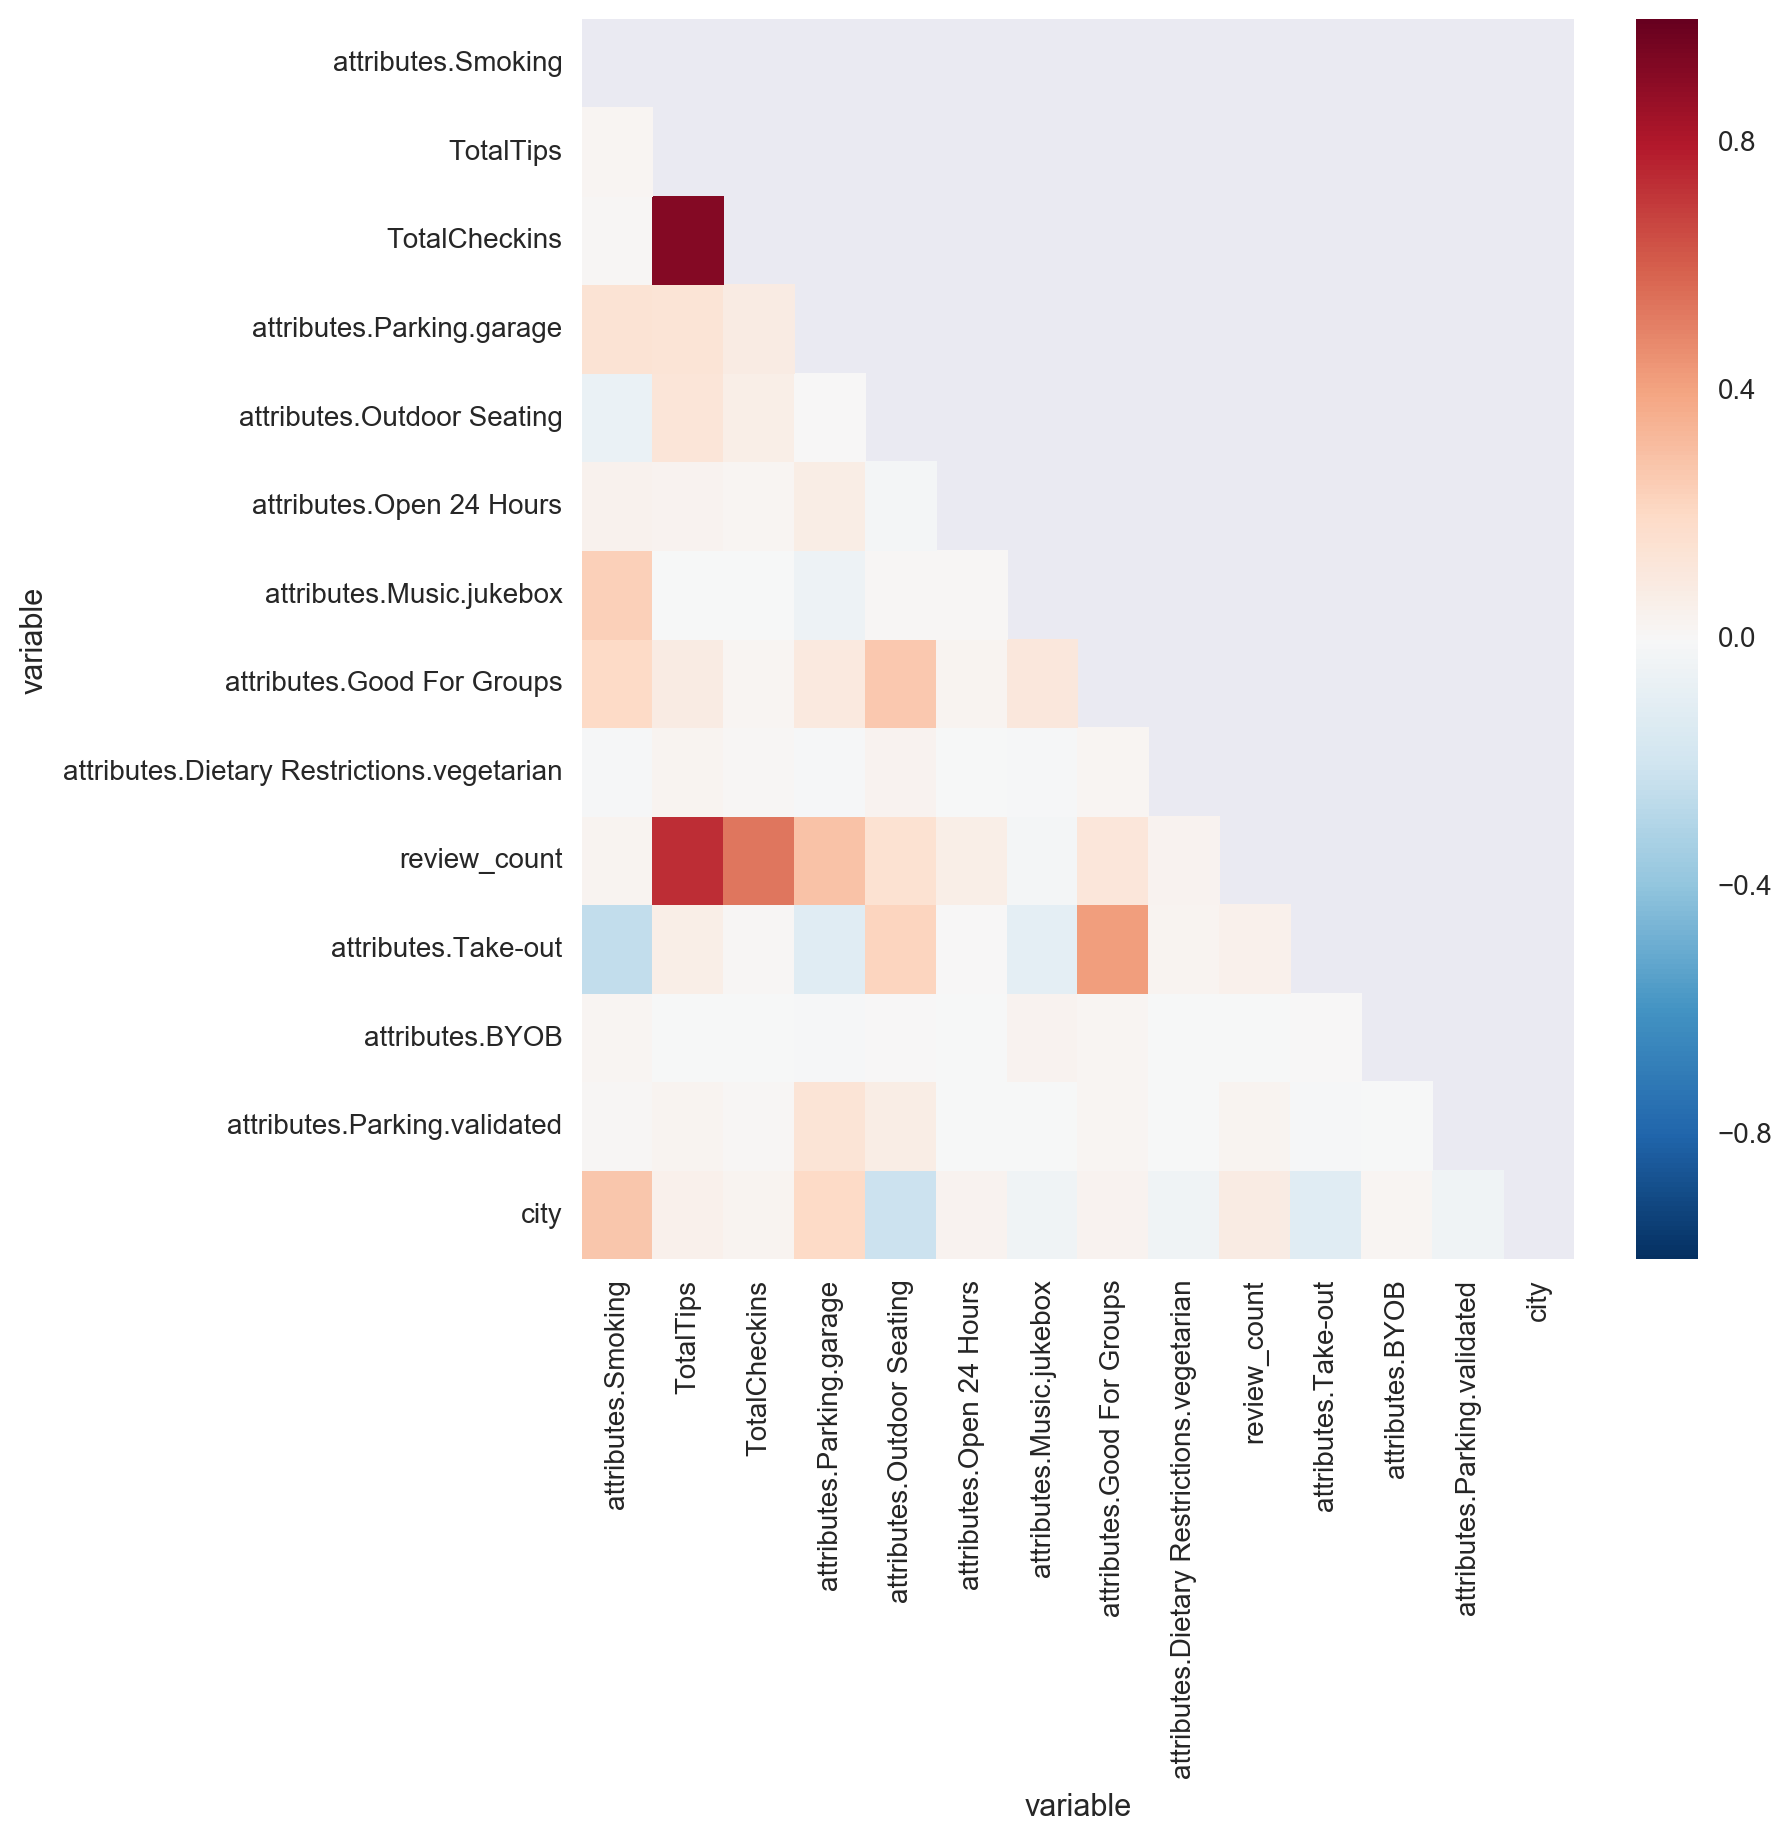

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

corrs = heatmap.corr()

# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(8,8))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(corrs, mask=mask)

# Resize the labels.
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=90)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

# If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
plt.show()

## Profile" for Las Vegas

The not very strong ridge model indicates that the remaining three quarters of variables to predict whether a business is located in Las Vegas are decently independent with some multicollinearity and that they are reasonably useful for out-of-sample prediction.

 - Businesses in Vegas tend to have the following qualities (positive coefs):
    - Allow smoking
    - Have Parking garage
    - Open 24 Hours
    - Are good for Groups
    - Welcome BYOB
    - Yelpers leave more Tips and Reviews
    
    
 - The following features are not popular (negative coefs):
    - Outdoor seating
    - Jukebox
    - Vegetarian
    - Takeouts
    - Validated Parking
    - Yelpers also do not like to Checkin in Vegas (Weird)
    
    
 - The following features are not useful predictors for Vegas (zero coefs):
    - Days of the week the business is open
    - Wi-Fi
    - Alcohol
    - Attire
    - Noise Level
    - Age Allowed
    - The following dietary restrictions (soy-free, halal, dairy-free, kosher)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Different categories of ratings

---

Yelp is finally ready to admit that their rating system sucks. No one cares about the ratings, they just use the site to find out what's nearby. The ratings are simply too unreliable for people. 

Yelp hypothesizes that this is, in fact, because different people tend to give their ratings based on different things. They believe that perhaps some people always base their ratings on quality of food, others on service, and perhaps other categories as well. 

1. Do some users tend to talk about service more than others in reviews/tips? Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.
2. Create two new ratings for businesses: ratings from just the service-focused reviews and ratings from the non-service reviews.
3. Construct a regression model for each of the two ratings. They should use the same predictor variables (of your choice). 
4. Validate the performance of the models.
5. Do the models coefficients differ at all? What does this tell you about the hypothesis that there are in fact two different kinds of ratings?

In [169]:
sql = """
SELECT *
FROM [bigquery-dsi-dave:yelp_arizona.reviews];
"""

reviews = pd.read_gbq(sql, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 10.97 s. Waiting...
  Elapsed 21.29 s. Waiting...
  Elapsed 32.17 s. Waiting...
Query done.
Processed: 277.3 Mb

Retrieving results...
  Got page: 1; 1.0% done. Elapsed 38.87 s.
  Got page: 2; 2.0% done. Elapsed 44.45 s.
  Got page: 3; 3.0% done. Elapsed 50.05 s.
  Got page: 4; 4.0% done. Elapsed 55.72 s.
  Got page: 5; 5.0% done. Elapsed 61.14 s.
  Got page: 6; 6.0% done. Elapsed 66.45 s.
  Got page: 7; 7.0% done. Elapsed 71.9 s.
  Got page: 8; 8.0% done. Elapsed 77.92 s.
  Got page: 9; 9.0% done. Elapsed 82.67 s.
  Got page: 10; 10.0% done. Elapsed 87.43 s.
  Got page: 11; 11.0% done. Elapsed 93.85 s.
  Got page: 12; 12.0% done. Elapsed 98.5 s.
  Got page: 13; 13.0% done. Elapsed 103.99 s.
  Got page: 14; 14.0% done. Elapsed 110.17 s.
  Got page: 15; 15.0% done. Elapsed 123.06 s.
  Got page: 16; 16.0% done. Elapsed 128.68 s.
  Got page: 17; 17.0% done. Elapsed 134.26 s.
  Got page: 18; 18.0% done. Elapsed 140.85 s.
  Got page: 19; 19

###  Divide up the tips/reviews into more "service-focused" ones and those less concerned with service.

In [172]:
reviews.columns.values

array(['user_id', 'review_id', 'votes_cool', 'business_id', 'votes_funny',
       'stars', 'date', 'votes_useful', 'minutes_10', 'minutes_15',
       'minutes_20', 'minutes_30', 'bar_food', 'beer_selection', 'best_ve',
       'bloody_mary', 'bottle_service', 'chicken_waffles',
       'customer_service', 'dance_floor', 'decided_try', 'definitely_come',
       'definitely_recommend', 'didn_want', 'don_know', 'don_like',
       'don_think', 'don_want', 'eggs_benedict', 'fast_food', 'feel_like',
       'felt_like', 'fish_chips', 'food_amazing', 'food_came',
       'food_delicious', 'food_good', 'food_great', 'food_just',
       'food_service', 'french_fries', 'french_toast', 'friday_night',
       'fried_chicken', 'friendly_staff', 'good_food', 'good_place',
       'good_service', 'good_thing', 'good_time', 'great_atmosphere',
       'great_experience', 'great_food', 'great_place', 'great_service',
       'great_time', 'happy_hour', 'hash_browns', 'highly_recommend',
       'hip_hop', 'ice

In [191]:
service_columns = ['user_id', 'review_id','business_id',
       'stars', 'date',
       'customer_service', 'friendly_staff',
       'good_service',  'great_service',
       'right_away', 'service_excellent', 'service_food',
       'service_friendly', 'service_good', 'service_great',
       'staff_friendly', 'super_friendly', 'wait_staff']

In [196]:
reviews_service = reviews[reviews[service_columns].sum(axis = 1) != 0]

In [241]:
reviews_rest = reviews[reviews[service_columns].sum(axis = 1) == 0]

In [244]:
print reviews.shape, reviews_service.shape, reviews_rest.shape, reviews_service.shape[0] + reviews_rest.shape[0]

(322398, 108) (57696, 108) (264702, 108) 322398


### Construct a regression model for each of the two ratings, using the same predictor variables

In [245]:
reviews_service.head()

,user_id,review_id,votes_cool,business_id,votes_funny,stars,date,votes_useful,minutes_10,minutes_15,...,service_great,staff_friendly,super_friendly,sweet_potato,tasted_like,time_vegas,try_place,ve_seen,ve_tried,wait_staff
8,Fju_dLKhwg6pV4ejPRzQig,ZmWPUD9uSO36E1YE_uPnOw,0,EKR3hv8vhML4xbkp9Hf9mQ,0,5,2015-10-27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,_X1zedRYJt_pf7fosmForA,qet1AuVlCLDrlQXuQgzNng,1,pfTwzep_4hRTX_jXoi38cw,0,5,2013-05-04,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,EKJVvRrFZiBjbkp6OcF4AQ,kzXr8lKmJp57etD5VVrjGA,1,j_pce4pG9krrBeYwUni8Pg,0,5,2015-01-08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27,k_l1SFukY_BsTN7LXX7ISg,j2jt5B-CeHCl6d89j7edxg,0,NsnZ5GhagXBKrCOelxVQxw,0,5,2013-07-11,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,ciGPRuXVAO8QXuwM80jHTg,Kho_E7P4HHWXiMzBSsJ-cQ,0,NsnZ5GhagXBKrCOelxVQxw,0,5,2014-02-21,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [246]:
y_service = reviews_service.stars.values
X_service = reviews_service.iloc[:, 8:].values

In [247]:
y_rest = reviews_rest.stars.values
X_rest = reviews_rest.iloc[:, 8:].values

In [269]:
# Gridsearch the LogisticRegression with regularization.

lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 100, 50)
}

lr_gs_service = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs_service.fit(X_service, y_service)
print lr_gs_service.best_params_
best_lr_service = lr_gs_service.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  1.1min
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed:  4.8min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 10.9min
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 12.1min finished


{'penalty': 'l2', 'C': 8.1633571428571425, 'solver': 'liblinear'}


In [270]:
lr_params = {
    'penalty':['l1','l2'],
    'solver':['liblinear'],
    'C':np.linspace(0.0001, 100, 50)
}

lr_gs_rest = GridSearchCV(LogisticRegression(), lr_params, cv=5, verbose=1)

lr_gs_rest.fit(X_rest, y_rest)
print lr_gs_rest.best_params_
best_lr_rest = lr_gs_rest.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:  4.5min
[Parallel(n_jobs=1)]: Done 199 tasks       | elapsed: 18.3min
[Parallel(n_jobs=1)]: Done 449 tasks       | elapsed: 41.8min
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 46.8min finished


{'penalty': 'l2', 'C': 38.775571428571432, 'solver': 'liblinear'}


In [272]:
cv_indices = StratifiedKFold(y_service, n_folds=5)

lr_service_scores = []

for train_inds, test_inds in cv_indices:

    Xtr_service, ytr_service = X_service[train_inds, :], y_service[train_inds]
    Xte_service, yte_service = X_service[test_inds, :], y_service[test_inds]
    
    
    best_lr_service.fit(Xtr_service, ytr_service)
    lr1_scores.append(best_lr1.score(Xte_service, yte_service))
     


print 'Logistic Regression Service:'
print lr_service_scores
print np.mean(lr_service_scores)


print 'Baseline Service accuracy:', np.mean(y_service)

ValueError: X has 100 features per sample; expecting 99

In [273]:
cv_indices = StratifiedKFold(y_rest, n_folds=5)

lr_rest_scores = []

for train_inds, test_inds in cv_indices:

    Xtr_rest, ytr_rest = X_rest[train_inds, :], y_rest[train_inds]
    Xte_rest, yte_rest = X_rest[test_inds, :], y_rest[test_inds]
    
    best_lr_rest.fit(Xtr_rest, ytr_rest)
    lr_scores.append(best_lr.score(Xte_rest, yte_rest))


print 'Logistic Regression Rest:'
print lr_rest_scores
print np.mean(lr_rest_scores)

print 'Baseline Rest accuracy:', np.mean(y_rest)

ValueError: X has 100 features per sample; expecting 99

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Identifying "elite" users

---

Yelp, though having their own formula for determining whether a user is elite or not, is interested in delving deeper into what differentiates an elite user from a normal user at a broader level.

Use a classification model to predict whether a user is elite or not. Note that users can be elite in some years and not in others.

1. What things predict well whether a user is elite or not?
- Validate the model.
- If you were to remove the "counts" metrics for users (reviews, votes, compliments), what distinguishes an elite user, if anything? Validate the model and compare it to the one with the count variables.
- Think of a way to visually represent your results in a compelling way.
- Give a brief write-up of your findings.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Find something interesting on your own

---

You want to impress your superiors at Yelp by doing some investigation into the data on your own. You want to do classification, but you're not sure on what.

1. Create a hypothesis or hypotheses about the data based on whatever you are interested in, as long as it is predicting a category of some kind (classification).
2. Explore the data visually (ideally related to this hypothesis).
3. Build one or more classification models to predict your target variable. **Your modeling should include gridsearching to find optimal model parameters.**
4. Evaluate the performance of your model. Explain why your model may have chosen those specific parameters during the gridsearch process.
5. Write up what the model tells you. Does it validate or invalidate your hypothesis? Write this up as if for a non-technical audience.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. ROC and Precision-recall

---

Some categories have fewer overall businesses than others. Choose two categories of businesses to predict, one that makes your proportion of target classes as even as possible, and another that has very few businesses and thus makes the target varible imbalanced.

1. Create two classification models predicting these categories. Optimize the models and choose variables as you see fit.
- Make confusion matrices for your models. Describe the confusion matrices and explain what they tell you about your models' performance.
- Make ROC curves for both models. What do the ROC curves describe and what do they tell you about your model?
- Make Precision-Recall curves for the models. What do they describe? How do they compare to the ROC curves?
- Explain when Precision-Recall may be preferable to ROC. Is that the case in either of your models?